# stock tracer

In [69]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import json

In [70]:
with open("holdings.json", "r") as json_file:
    holdings = json.load(json_file)

stocks = list(holdings.keys())


In [71]:
# trbcx = yf.Ticker("trbcx")
# trbcx_history = trbcx.history(period="6mo")

<function matplotlib.pyplot.show(close=None, block=None)>

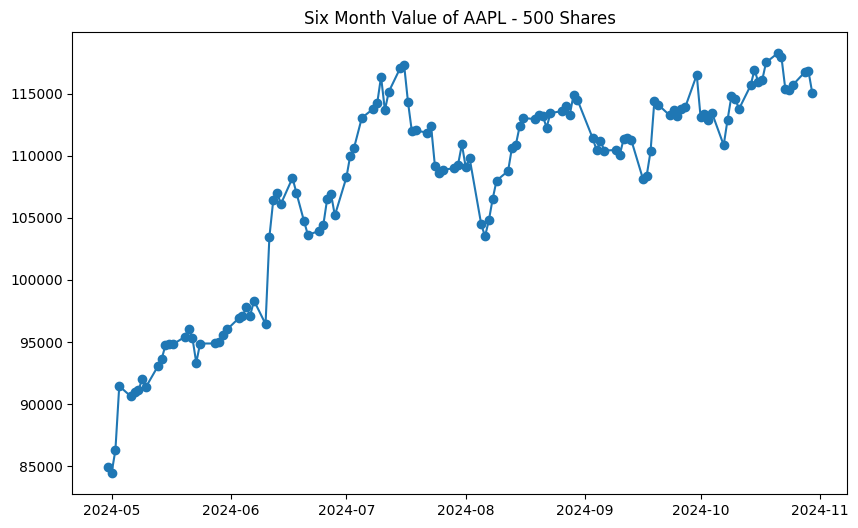

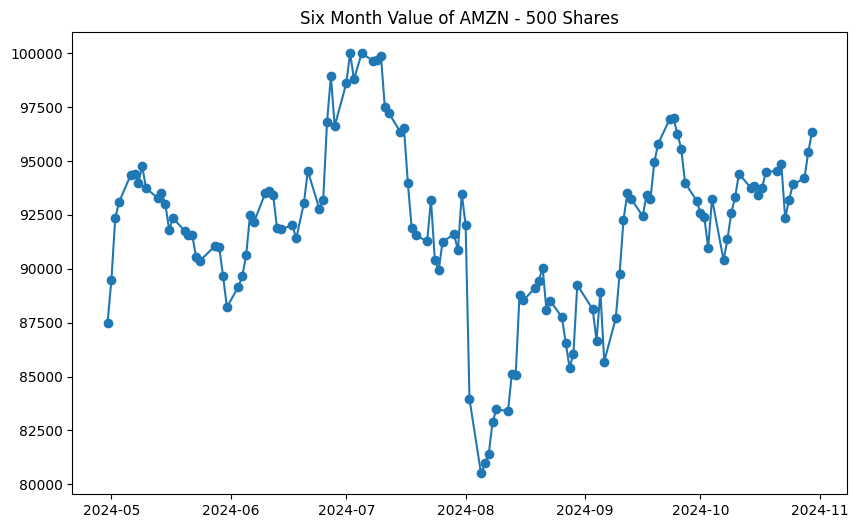

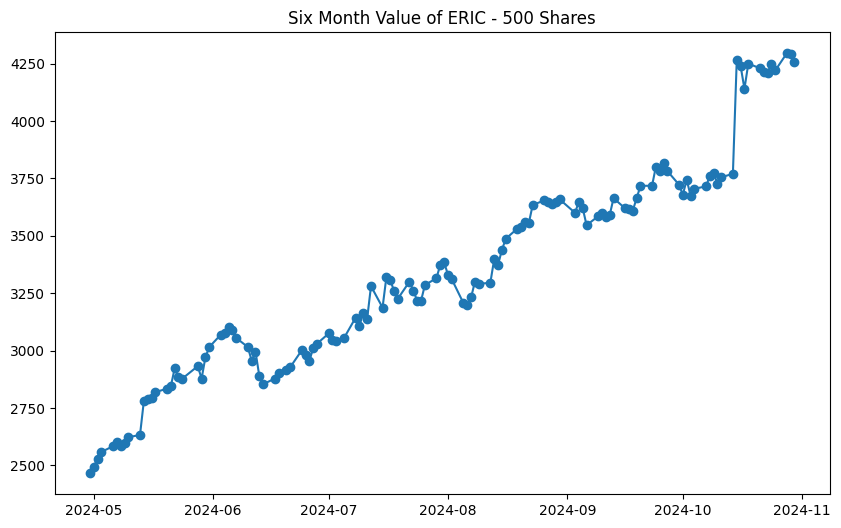

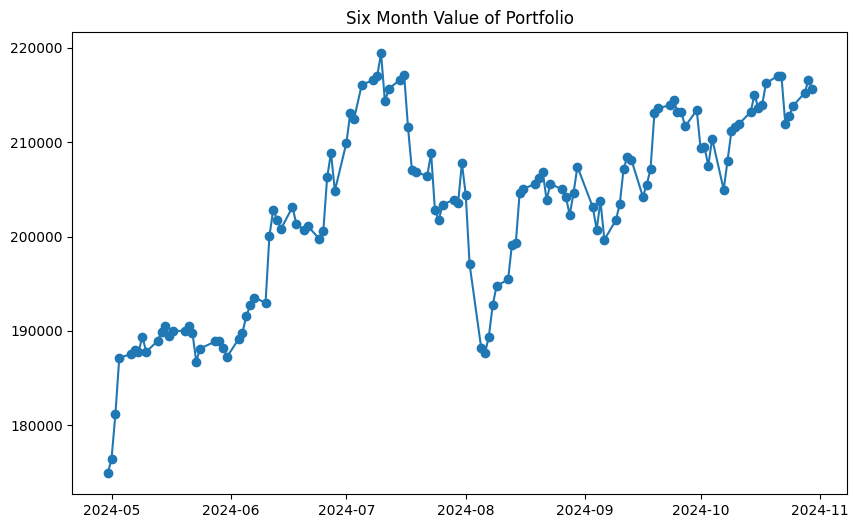

In [72]:
value = dict()
historic = pd.DataFrame()

for stock in stocks:
    plt.figure(figsize=(10,6))
    info = yf.Ticker(stock)
    value[stock] = holdings[stock] * info.info['regularMarketPreviousClose']
    stock_history = info.history(period="6mo")
    historic = pd.concat([historic, (stock_history['Close'] * holdings[stock]).rename(stock)], axis=1)
    plt.plot(stock_history.index, stock_history['Close'] * holdings[stock], marker='o', linestyle='-')
    plt.title(f'Six Month Value of {stock} - {holdings[stock]} Shares')
    plt.show



historic['Total'] = historic.sum(axis=1)
plt.figure(figsize=(10,6))
plt.plot(historic.index, historic['Total'], marker='o', linestyle='-')
plt.title(f'Six Month Value of Portfolio')
plt.show